In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [68]:
df = pd.read_csv('heart_disease.csv')

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: >

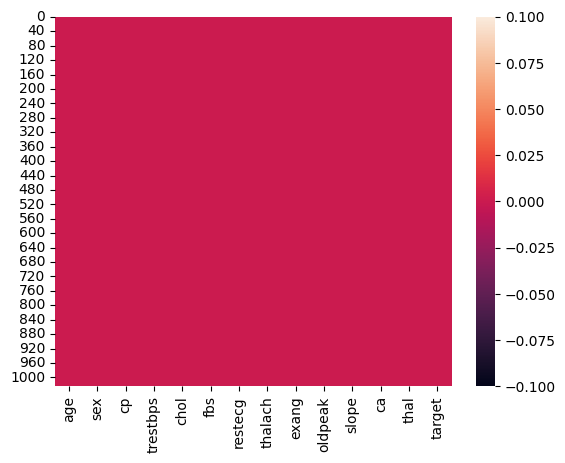

In [70]:
sns.heatmap(df.isnull())  # the dataset is actually clean

#### Machine Learning with DecisionTree and Random Forest

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop('target',axis=1)

In [73]:
y = df['target']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model_tree =  DecisionTreeClassifier()

In [77]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
predictions = model_tree.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
print(confusion_matrix(y_test,predictions))

[[148   0]
 [ 13 147]]


In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       148
           1       1.00      0.92      0.96       160

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



### Improving the Decision Tree using the Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model_forest = RandomForestClassifier(n_estimators=200)

In [84]:
model_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [85]:
predictions_forest  = model_forest.predict(X_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(classification_report(y_test,predictions_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [88]:
print(confusion_matrix(y_test,predictions_forest))

[[148   0]
 [  0 160]]


In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_forest)

print("accuracy score: ", accuracy)


accuracy score:  1.0


In [117]:
df.head(6)  # the actual true values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [118]:
#predictions_forest[0] # the prediction of the model
# predictions_forest[1]
# predictions_forest[2]
# predictions_forest[3]
# predictions_forest[4]
predictions_forest[5]


0

In [113]:
predictions_forest[6]

1

##### Model Save

In [123]:
import joblib
joblib.dump(model_tree,'Ogiki_Moses_Odera_DT_model')
omo_dt = joblib.load('Ogiki_Moses_Odera_DT_model')

In [124]:
import joblib
joblib.dump(model_forest,'Ogiki_Moses_Odera_RF_model')
omo_dt = joblib.load('Ogiki_Moses_Odera_RF_model')